In [1]:
import flair.datasets
from flair.data import Sentence
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings, StackedEmbeddings
from flair.models import TextClassifier
from flair.models.text_regression_model import TextRegressor
from flair.trainers import ModelTrainer
import os

In [2]:
os.getenv('FLAIR_CACHE_ROOT') 

'/media/joey/Samsung_T5/FLAIR_CACHE_ROOT/'

In [3]:
corpus = flair.datasets.SENTEVAL_SST_GRANULAR()
print(corpus)

2021-01-28 11:55:25,803 Reading data from /media/joey/Samsung_T5/FLAIR_CACHE_ROOT/datasets/senteval_sst_granular
2021-01-28 11:55:25,804 Train: /media/joey/Samsung_T5/FLAIR_CACHE_ROOT/datasets/senteval_sst_granular/train.txt
2021-01-28 11:55:25,804 Dev: /media/joey/Samsung_T5/FLAIR_CACHE_ROOT/datasets/senteval_sst_granular/dev.txt
2021-01-28 11:55:25,805 Test: /media/joey/Samsung_T5/FLAIR_CACHE_ROOT/datasets/senteval_sst_granular/test.txt
Corpus: 8544 train + 1101 dev + 2210 test sentences


In [6]:
word_embeddings = [WordEmbeddings('glove'), FlairEmbeddings('news-forward'), FlairEmbeddings('news-backward')]

In [4]:
# 4. initialize document embedding by passing list of word embeddings
# Can choose between many RNN types (GRU by default, to change use rnn_type parameter)
document_embeddings = DocumentRNNEmbeddings(word_embeddings, hidden_size=256)

# 5. create the text classifier
regressor = TextRegressor(document_embeddings)

# 6. initialize the text classifier trainer
trainer = ModelTrainer(regressor, corpus)

# 7. start the training
trainer.train('model/sentiment_regressor2',
              learning_rate=0.1,
              mini_batch_size=32,
              anneal_factor=0.5,
              patience=5,
              max_epochs=200,
              checkpoint=True)

2021-01-04 17:05:10,597 Using REGRESSION - experimental
2021-01-04 17:05:10,601 ----------------------------------------------------------------------------------------------------
2021-01-04 17:05:10,602 Model: "TextRegressor(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=4196, o

2021-01-04 17:07:12,454 EPOCH 4 done: loss 1.3682 - lr 0.1000000
2021-01-04 17:07:13,911 DEV : loss 0.03376387432217598 - score 0.6064
2021-01-04 17:07:13,995 BAD EPOCHS (no improvement): 1
2021-01-04 17:07:16,018 ----------------------------------------------------------------------------------------------------
2021-01-04 17:07:17,564 epoch 5 - iter 26/267 - loss 1.40646054 - samples/sec: 538.77 - lr: 0.100000
2021-01-04 17:07:19,058 epoch 5 - iter 52/267 - loss 1.39600019 - samples/sec: 557.16 - lr: 0.100000
2021-01-04 17:07:20,555 epoch 5 - iter 78/267 - loss 1.36616240 - samples/sec: 556.25 - lr: 0.100000
2021-01-04 17:07:22,051 epoch 5 - iter 104/267 - loss 1.36428059 - samples/sec: 556.96 - lr: 0.100000
2021-01-04 17:07:23,633 epoch 5 - iter 130/267 - loss 1.34990165 - samples/sec: 526.37 - lr: 0.100000
2021-01-04 17:07:25,140 epoch 5 - iter 156/267 - loss 1.34332182 - samples/sec: 552.71 - lr: 0.100000
2021-01-04 17:07:26,636 epoch 5 - iter 182/267 - loss 1.33946129 - samples/s

2021-01-04 17:09:08,705 epoch 10 - iter 182/267 - loss 1.09002647 - samples/sec: 520.07 - lr: 0.100000
2021-01-04 17:09:10,327 epoch 10 - iter 208/267 - loss 1.09792890 - samples/sec: 513.15 - lr: 0.100000
2021-01-04 17:09:11,849 epoch 10 - iter 234/267 - loss 1.09997508 - samples/sec: 547.13 - lr: 0.100000
2021-01-04 17:09:13,550 epoch 10 - iter 260/267 - loss 1.10046945 - samples/sec: 489.78 - lr: 0.100000
2021-01-04 17:09:13,991 ----------------------------------------------------------------------------------------------------
2021-01-04 17:09:13,992 EPOCH 10 done: loss 1.0999 - lr 0.1000000
2021-01-04 17:09:15,410 DEV : loss 0.031247448176145554 - score 0.6678
2021-01-04 17:09:15,491 BAD EPOCHS (no improvement): 0
saving best model
2021-01-04 17:09:19,486 ----------------------------------------------------------------------------------------------------
2021-01-04 17:09:20,958 epoch 11 - iter 26/267 - loss 1.05255662 - samples/sec: 566.02 - lr: 0.100000
2021-01-04 17:09:22,452 ep

2021-01-04 17:11:01,313 epoch 16 - iter 26/267 - loss 1.02661658 - samples/sec: 537.98 - lr: 0.100000
2021-01-04 17:11:02,787 epoch 16 - iter 52/267 - loss 1.01867683 - samples/sec: 565.24 - lr: 0.100000
2021-01-04 17:11:04,279 epoch 16 - iter 78/267 - loss 1.02340280 - samples/sec: 557.98 - lr: 0.100000
2021-01-04 17:11:05,830 epoch 16 - iter 104/267 - loss 1.01540919 - samples/sec: 537.07 - lr: 0.100000
2021-01-04 17:11:07,428 epoch 16 - iter 130/267 - loss 1.01759614 - samples/sec: 521.28 - lr: 0.100000
2021-01-04 17:11:08,923 epoch 16 - iter 156/267 - loss 1.02006822 - samples/sec: 556.91 - lr: 0.100000
2021-01-04 17:11:10,388 epoch 16 - iter 182/267 - loss 1.03709238 - samples/sec: 568.54 - lr: 0.100000
2021-01-04 17:11:11,848 epoch 16 - iter 208/267 - loss 1.02795376 - samples/sec: 570.61 - lr: 0.100000
2021-01-04 17:11:13,371 epoch 16 - iter 234/267 - loss 1.02146843 - samples/sec: 546.76 - lr: 0.100000
2021-01-04 17:11:14,827 epoch 16 - iter 260/267 - loss 1.02169665 - samples/

2021-01-04 17:12:48,346 epoch 21 - iter 234/267 - loss 0.89837292 - samples/sec: 594.74 - lr: 0.050000
2021-01-04 17:12:49,810 epoch 21 - iter 260/267 - loss 0.89944674 - samples/sec: 569.18 - lr: 0.050000
2021-01-04 17:12:50,250 ----------------------------------------------------------------------------------------------------
2021-01-04 17:12:50,251 EPOCH 21 done: loss 0.8967 - lr 0.0500000
2021-01-04 17:12:51,604 DEV : loss 0.02656266652047634 - score 0.6986
2021-01-04 17:12:51,685 BAD EPOCHS (no improvement): 1
2021-01-04 17:12:53,645 ----------------------------------------------------------------------------------------------------
2021-01-04 17:12:55,162 epoch 22 - iter 26/267 - loss 0.87366107 - samples/sec: 549.43 - lr: 0.050000
2021-01-04 17:12:56,619 epoch 22 - iter 52/267 - loss 0.85065685 - samples/sec: 571.64 - lr: 0.050000
2021-01-04 17:12:58,115 epoch 22 - iter 78/267 - loss 0.88094732 - samples/sec: 556.33 - lr: 0.050000
2021-01-04 17:12:59,590 epoch 22 - iter 104/267

2021-01-04 17:14:34,186 epoch 27 - iter 78/267 - loss 0.83419730 - samples/sec: 571.43 - lr: 0.050000
2021-01-04 17:14:35,663 epoch 27 - iter 104/267 - loss 0.83916165 - samples/sec: 563.95 - lr: 0.050000
2021-01-04 17:14:37,132 epoch 27 - iter 130/267 - loss 0.84112713 - samples/sec: 567.02 - lr: 0.050000
2021-01-04 17:14:39,003 epoch 27 - iter 156/267 - loss 0.84638380 - samples/sec: 445.14 - lr: 0.050000
2021-01-04 17:14:40,493 epoch 27 - iter 182/267 - loss 0.84272404 - samples/sec: 558.86 - lr: 0.050000
2021-01-04 17:14:41,964 epoch 27 - iter 208/267 - loss 0.84096102 - samples/sec: 566.04 - lr: 0.050000
2021-01-04 17:14:43,459 epoch 27 - iter 234/267 - loss 0.84399412 - samples/sec: 557.27 - lr: 0.050000
2021-01-04 17:14:44,916 epoch 27 - iter 260/267 - loss 0.84903242 - samples/sec: 571.54 - lr: 0.050000
2021-01-04 17:14:45,309 ----------------------------------------------------------------------------------------------------
2021-01-04 17:14:45,309 EPOCH 27 done: loss 0.8479 -

2021-01-04 17:16:22,408 EPOCH 32 done: loss 0.8229 - lr 0.0500000
2021-01-04 17:16:23,812 DEV : loss 0.026094838976860046 - score 0.7181
2021-01-04 17:16:23,893 BAD EPOCHS (no improvement): 0
saving best model
2021-01-04 17:16:28,107 ----------------------------------------------------------------------------------------------------
2021-01-04 17:16:29,590 epoch 33 - iter 26/267 - loss 0.79522472 - samples/sec: 561.85 - lr: 0.050000
2021-01-04 17:16:31,082 epoch 33 - iter 52/267 - loss 0.78533424 - samples/sec: 558.28 - lr: 0.050000
2021-01-04 17:16:32,562 epoch 33 - iter 78/267 - loss 0.77809143 - samples/sec: 562.85 - lr: 0.050000
2021-01-04 17:16:34,086 epoch 33 - iter 104/267 - loss 0.79849258 - samples/sec: 546.31 - lr: 0.050000
2021-01-04 17:16:35,651 epoch 33 - iter 130/267 - loss 0.80012330 - samples/sec: 532.21 - lr: 0.050000
2021-01-04 17:16:37,142 epoch 33 - iter 156/267 - loss 0.80557316 - samples/sec: 558.66 - lr: 0.050000
2021-01-04 17:16:38,713 epoch 33 - iter 182/267 - 

2021-01-04 17:18:17,611 epoch 38 - iter 182/267 - loss 0.77969954 - samples/sec: 550.39 - lr: 0.050000
2021-01-04 17:18:19,304 epoch 38 - iter 208/267 - loss 0.77846298 - samples/sec: 491.92 - lr: 0.050000
2021-01-04 17:18:21,051 epoch 38 - iter 234/267 - loss 0.77502656 - samples/sec: 476.47 - lr: 0.050000
2021-01-04 17:18:22,943 epoch 38 - iter 260/267 - loss 0.77190098 - samples/sec: 440.22 - lr: 0.050000
2021-01-04 17:18:23,422 ----------------------------------------------------------------------------------------------------
2021-01-04 17:18:23,423 EPOCH 38 done: loss 0.7758 - lr 0.0500000
2021-01-04 17:18:24,914 DEV : loss 0.02591586858034134 - score 0.7207
2021-01-04 17:18:24,997 BAD EPOCHS (no improvement): 0
saving best model
2021-01-04 17:18:29,074 ----------------------------------------------------------------------------------------------------
2021-01-04 17:18:30,687 epoch 39 - iter 26/267 - loss 0.72542980 - samples/sec: 516.21 - lr: 0.050000
2021-01-04 17:18:32,300 epo

2021-01-04 17:20:09,890 epoch 44 - iter 26/267 - loss 0.69066183 - samples/sec: 559.26 - lr: 0.050000
2021-01-04 17:20:11,334 epoch 44 - iter 52/267 - loss 0.69325873 - samples/sec: 576.73 - lr: 0.050000
2021-01-04 17:20:12,802 epoch 44 - iter 78/267 - loss 0.70775074 - samples/sec: 567.65 - lr: 0.050000
2021-01-04 17:20:14,230 epoch 44 - iter 104/267 - loss 0.72553887 - samples/sec: 583.02 - lr: 0.050000
2021-01-04 17:20:15,669 epoch 44 - iter 130/267 - loss 0.72867109 - samples/sec: 578.99 - lr: 0.050000
2021-01-04 17:20:17,103 epoch 44 - iter 156/267 - loss 0.73066166 - samples/sec: 580.77 - lr: 0.050000
2021-01-04 17:20:18,564 epoch 44 - iter 182/267 - loss 0.72425418 - samples/sec: 570.11 - lr: 0.050000
2021-01-04 17:20:20,022 epoch 44 - iter 208/267 - loss 0.71981237 - samples/sec: 571.27 - lr: 0.050000
2021-01-04 17:20:21,504 epoch 44 - iter 234/267 - loss 0.72095780 - samples/sec: 561.92 - lr: 0.050000
2021-01-04 17:20:22,958 epoch 44 - iter 260/267 - loss 0.72787010 - samples/

2021-01-04 17:21:59,230 epoch 49 - iter 234/267 - loss 0.67846503 - samples/sec: 568.82 - lr: 0.025000
2021-01-04 17:22:00,758 epoch 49 - iter 260/267 - loss 0.68139670 - samples/sec: 545.07 - lr: 0.025000
2021-01-04 17:22:01,181 ----------------------------------------------------------------------------------------------------
2021-01-04 17:22:01,182 EPOCH 49 done: loss 0.6784 - lr 0.0250000
2021-01-04 17:22:02,603 DEV : loss 0.02418825589120388 - score 0.7293
2021-01-04 17:22:02,685 BAD EPOCHS (no improvement): 0
saving best model
2021-01-04 17:22:06,601 ----------------------------------------------------------------------------------------------------
2021-01-04 17:22:08,204 epoch 50 - iter 26/267 - loss 0.64345558 - samples/sec: 519.75 - lr: 0.025000
2021-01-04 17:22:09,883 epoch 50 - iter 52/267 - loss 0.68739217 - samples/sec: 495.95 - lr: 0.025000
2021-01-04 17:22:11,568 epoch 50 - iter 78/267 - loss 0.69805077 - samples/sec: 494.05 - lr: 0.025000
2021-01-04 17:22:13,379 epoch

2021-01-04 17:23:49,242 epoch 55 - iter 78/267 - loss 0.66938462 - samples/sec: 530.23 - lr: 0.025000
2021-01-04 17:23:50,853 epoch 55 - iter 104/267 - loss 0.65596218 - samples/sec: 517.01 - lr: 0.025000
2021-01-04 17:23:52,449 epoch 55 - iter 130/267 - loss 0.66256269 - samples/sec: 521.66 - lr: 0.025000
2021-01-04 17:23:54,011 epoch 55 - iter 156/267 - loss 0.65676708 - samples/sec: 533.36 - lr: 0.025000
2021-01-04 17:23:55,582 epoch 55 - iter 182/267 - loss 0.65651386 - samples/sec: 530.13 - lr: 0.025000
2021-01-04 17:23:57,093 epoch 55 - iter 208/267 - loss 0.64903216 - samples/sec: 551.24 - lr: 0.025000
2021-01-04 17:23:58,584 epoch 55 - iter 234/267 - loss 0.64930715 - samples/sec: 558.50 - lr: 0.025000
2021-01-04 17:24:00,160 epoch 55 - iter 260/267 - loss 0.64667182 - samples/sec: 528.52 - lr: 0.025000
2021-01-04 17:24:00,568 ----------------------------------------------------------------------------------------------------
2021-01-04 17:24:00,569 EPOCH 55 done: loss 0.6444 -

2021-01-04 17:25:39,535 ----------------------------------------------------------------------------------------------------
2021-01-04 17:25:39,535 EPOCH 60 done: loss 0.6244 - lr 0.0125000
2021-01-04 17:25:40,892 DEV : loss 0.024686381220817566 - score 0.7256
2021-01-04 17:25:40,972 BAD EPOCHS (no improvement): 1
2021-01-04 17:25:42,926 ----------------------------------------------------------------------------------------------------
2021-01-04 17:25:44,494 epoch 61 - iter 26/267 - loss 0.62307935 - samples/sec: 531.43 - lr: 0.012500
2021-01-04 17:25:46,014 epoch 61 - iter 52/267 - loss 0.61177816 - samples/sec: 547.81 - lr: 0.012500
2021-01-04 17:25:47,677 epoch 61 - iter 78/267 - loss 0.61818294 - samples/sec: 501.24 - lr: 0.012500
2021-01-04 17:25:49,297 epoch 61 - iter 104/267 - loss 0.60718825 - samples/sec: 514.00 - lr: 0.012500
2021-01-04 17:25:50,786 epoch 61 - iter 130/267 - loss 0.61985238 - samples/sec: 559.22 - lr: 0.012500
2021-01-04 17:25:52,242 epoch 61 - iter 156/26

2021-01-04 17:27:30,230 epoch 66 - iter 130/267 - loss 0.60869834 - samples/sec: 562.52 - lr: 0.006250
2021-01-04 17:27:31,678 epoch 66 - iter 156/267 - loss 0.60582282 - samples/sec: 575.04 - lr: 0.006250
2021-01-04 17:27:33,156 epoch 66 - iter 182/267 - loss 0.59414046 - samples/sec: 563.57 - lr: 0.006250
2021-01-04 17:27:34,760 epoch 66 - iter 208/267 - loss 0.59554201 - samples/sec: 519.29 - lr: 0.006250
2021-01-04 17:27:36,241 epoch 66 - iter 234/267 - loss 0.59545224 - samples/sec: 562.35 - lr: 0.006250
2021-01-04 17:27:37,827 epoch 66 - iter 260/267 - loss 0.60111766 - samples/sec: 525.17 - lr: 0.006250
2021-01-04 17:27:38,231 ----------------------------------------------------------------------------------------------------
2021-01-04 17:27:38,232 EPOCH 66 done: loss 0.6039 - lr 0.0062500
2021-01-04 17:27:39,645 DEV : loss 0.024411216378211975 - score 0.7288
2021-01-04 17:27:39,725 BAD EPOCHS (no improvement): 1
2021-01-04 17:27:41,888 -----------------------------------------

Epoch    71: reducing learning rate of group 0 to 3.1250e-03.
2021-01-04 17:29:17,644 BAD EPOCHS (no improvement): 6
2021-01-04 17:29:19,651 ----------------------------------------------------------------------------------------------------
2021-01-04 17:29:21,203 epoch 72 - iter 26/267 - loss 0.59458071 - samples/sec: 536.70 - lr: 0.003125
2021-01-04 17:29:22,780 epoch 72 - iter 52/267 - loss 0.59458057 - samples/sec: 528.23 - lr: 0.003125
2021-01-04 17:29:24,377 epoch 72 - iter 78/267 - loss 0.58731891 - samples/sec: 521.46 - lr: 0.003125
2021-01-04 17:29:25,834 epoch 72 - iter 104/267 - loss 0.59270053 - samples/sec: 571.67 - lr: 0.003125
2021-01-04 17:29:27,447 epoch 72 - iter 130/267 - loss 0.59334367 - samples/sec: 516.28 - lr: 0.003125
2021-01-04 17:29:28,912 epoch 72 - iter 156/267 - loss 0.59908877 - samples/sec: 568.59 - lr: 0.003125
2021-01-04 17:29:30,449 epoch 72 - iter 182/267 - loss 0.59318042 - samples/sec: 541.76 - lr: 0.003125
2021-01-04 17:29:31,969 epoch 72 - iter 

2021-01-04 17:31:06,476 epoch 77 - iter 182/267 - loss 0.57479456 - samples/sec: 552.56 - lr: 0.003125
2021-01-04 17:31:08,034 epoch 77 - iter 208/267 - loss 0.57382546 - samples/sec: 534.64 - lr: 0.003125
2021-01-04 17:31:09,594 epoch 77 - iter 234/267 - loss 0.56935367 - samples/sec: 534.10 - lr: 0.003125
2021-01-04 17:31:11,143 epoch 77 - iter 260/267 - loss 0.57120454 - samples/sec: 537.46 - lr: 0.003125
2021-01-04 17:31:11,538 ----------------------------------------------------------------------------------------------------
2021-01-04 17:31:11,539 EPOCH 77 done: loss 0.5750 - lr 0.0031250
2021-01-04 17:31:12,862 DEV : loss 0.024407552555203438 - score 0.7286
Epoch    77: reducing learning rate of group 0 to 1.5625e-03.
2021-01-04 17:31:12,943 BAD EPOCHS (no improvement): 6
2021-01-04 17:31:14,883 ----------------------------------------------------------------------------------------------------
2021-01-04 17:31:16,351 epoch 78 - iter 26/267 - loss 0.61037058 - samples/sec: 567.

2021-01-04 17:32:53,690 epoch 83 - iter 26/267 - loss 0.54123228 - samples/sec: 482.08 - lr: 0.001563
2021-01-04 17:32:55,405 epoch 83 - iter 52/267 - loss 0.57247022 - samples/sec: 485.66 - lr: 0.001563
2021-01-04 17:32:56,894 epoch 83 - iter 78/267 - loss 0.58395129 - samples/sec: 559.47 - lr: 0.001563
2021-01-04 17:32:58,548 epoch 83 - iter 104/267 - loss 0.58356410 - samples/sec: 503.46 - lr: 0.001563
2021-01-04 17:33:00,215 epoch 83 - iter 130/267 - loss 0.58657041 - samples/sec: 499.55 - lr: 0.001563
2021-01-04 17:33:01,884 epoch 83 - iter 156/267 - loss 0.57851141 - samples/sec: 498.86 - lr: 0.001563
2021-01-04 17:33:03,360 epoch 83 - iter 182/267 - loss 0.58088248 - samples/sec: 564.64 - lr: 0.001563
2021-01-04 17:33:04,960 epoch 83 - iter 208/267 - loss 0.58313838 - samples/sec: 520.34 - lr: 0.001563
2021-01-04 17:33:06,487 epoch 83 - iter 234/267 - loss 0.58455500 - samples/sec: 545.30 - lr: 0.001563
2021-01-04 17:33:08,121 epoch 83 - iter 260/267 - loss 0.58590981 - samples/

2021-01-04 17:34:44,067 epoch 88 - iter 234/267 - loss 0.58692516 - samples/sec: 555.32 - lr: 0.000781
2021-01-04 17:34:45,542 epoch 88 - iter 260/267 - loss 0.59226359 - samples/sec: 564.55 - lr: 0.000781
2021-01-04 17:34:45,959 ----------------------------------------------------------------------------------------------------
2021-01-04 17:34:45,959 EPOCH 88 done: loss 0.5915 - lr 0.0007813
2021-01-04 17:34:47,390 DEV : loss 0.02437438815832138 - score 0.7287
2021-01-04 17:34:47,470 BAD EPOCHS (no improvement): 5
2021-01-04 17:34:49,520 ----------------------------------------------------------------------------------------------------
2021-01-04 17:34:51,047 epoch 89 - iter 26/267 - loss 0.61407334 - samples/sec: 545.48 - lr: 0.000781
2021-01-04 17:34:52,668 epoch 89 - iter 52/267 - loss 0.59022935 - samples/sec: 513.75 - lr: 0.000781
2021-01-04 17:34:54,212 epoch 89 - iter 78/267 - loss 0.60112192 - samples/sec: 539.36 - lr: 0.000781
2021-01-04 17:34:55,690 epoch 89 - iter 104/267

2021-01-04 17:36:32,735 epoch 94 - iter 78/267 - loss 0.57540816 - samples/sec: 455.27 - lr: 0.000391
2021-01-04 17:36:34,456 epoch 94 - iter 104/267 - loss 0.57904650 - samples/sec: 483.97 - lr: 0.000391
2021-01-04 17:36:36,242 epoch 94 - iter 130/267 - loss 0.58535203 - samples/sec: 466.28 - lr: 0.000391
2021-01-04 17:36:37,963 epoch 94 - iter 156/267 - loss 0.57949736 - samples/sec: 483.87 - lr: 0.000391
2021-01-04 17:36:39,689 epoch 94 - iter 182/267 - loss 0.57417880 - samples/sec: 482.48 - lr: 0.000391
2021-01-04 17:36:41,312 epoch 94 - iter 208/267 - loss 0.57926932 - samples/sec: 513.22 - lr: 0.000391
2021-01-04 17:36:43,036 epoch 94 - iter 234/267 - loss 0.58223985 - samples/sec: 482.96 - lr: 0.000391
2021-01-04 17:36:44,676 epoch 94 - iter 260/267 - loss 0.58196906 - samples/sec: 507.71 - lr: 0.000391
2021-01-04 17:36:45,148 ----------------------------------------------------------------------------------------------------
2021-01-04 17:36:45,149 EPOCH 94 done: loss 0.5812 -

2021-01-04 17:38:31,772 ----------------------------------------------------------------------------------------------------
2021-01-04 17:38:31,772 EPOCH 99 done: loss 0.5871 - lr 0.0001953
2021-01-04 17:38:33,341 DEV : loss 0.024439774453639984 - score 0.7285
2021-01-04 17:38:33,421 BAD EPOCHS (no improvement): 4
2021-01-04 17:38:35,468 ----------------------------------------------------------------------------------------------------
2021-01-04 17:38:37,043 epoch 100 - iter 26/267 - loss 0.60127955 - samples/sec: 529.04 - lr: 0.000195
2021-01-04 17:38:38,675 epoch 100 - iter 52/267 - loss 0.60333980 - samples/sec: 510.32 - lr: 0.000195
2021-01-04 17:38:40,290 epoch 100 - iter 78/267 - loss 0.60191463 - samples/sec: 515.55 - lr: 0.000195
2021-01-04 17:38:41,816 epoch 100 - iter 104/267 - loss 0.59122212 - samples/sec: 545.82 - lr: 0.000195
2021-01-04 17:38:43,337 epoch 100 - iter 130/267 - loss 0.58399080 - samples/sec: 547.71 - lr: 0.000195
2021-01-04 17:38:45,067 epoch 100 - iter 

{'test_score': 0.740996574317784,
 'dev_score_history': [0.5457648399136938,
  0.5605952122756659,
  0.611191576228677,
  0.6063822954826363,
  0.6291561593715838,
  0.6443042849526335,
  0.6648545340676734,
  0.6530584971311226,
  0.6605852395875265,
  0.6677978658871402,
  0.6828326455567311,
  0.6770624754267023,
  0.6928040708944434,
  0.6759685482400801,
  0.6896405862299257,
  0.6895052550605164,
  0.6830012822413487,
  0.6903705815995289,
  0.6760130621850706,
  0.6988980782349452,
  0.6985988104545835,
  0.7058366114695256,
  0.7006521663004956,
  0.7055122445168927,
  0.7037106878472272,
  0.7094660841623008,
  0.7109456979849589,
  0.7097786686808477,
  0.7106765510409796,
  0.7106866103489731,
  0.710401407538455,
  0.7180820258095593,
  0.7143743352684607,
  0.7170179303512985,
  0.7144485502780167,
  0.7140535469263414,
  0.7154793601376888,
  0.7206747110034826,
  0.7158914255231911,
  0.7170813714437592,
  0.71748430189138,
  0.7236988856479739,
  0.7218671000692102,
  0

In [15]:
from flair.visual.training_curves import Plotter
plotter = Plotter()

2021-01-28 12:09:49,427 ----------------------------------------------------------------------------------------------------
2021-01-28 12:09:49,428 WARNING: No LOSS found for test split in this data.
2021-01-28 12:09:49,429 Are you sure you want to plot LOSS and not another value?
2021-01-28 12:09:49,429 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in model/sentiment_regressor2/training.png


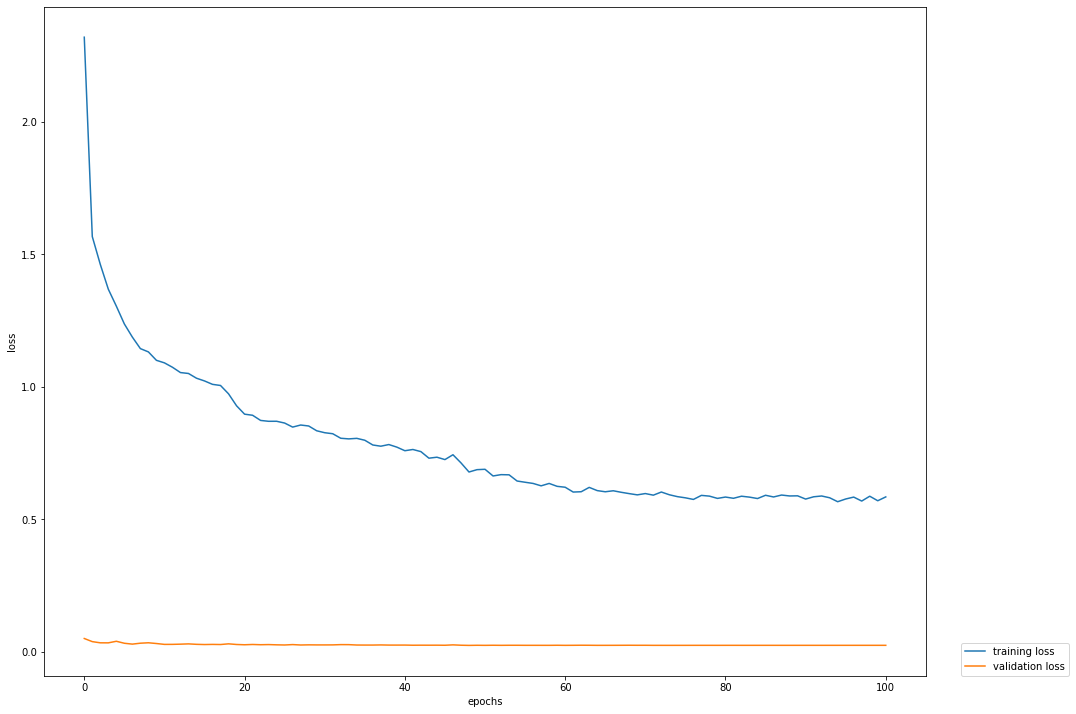

In [20]:
plotter.plot_training_curves('model/sentiment_regressor2/loss.tsv', plot_values=['loss'])

Weights plots are saved in model/sentiment_regressor2/weights.png


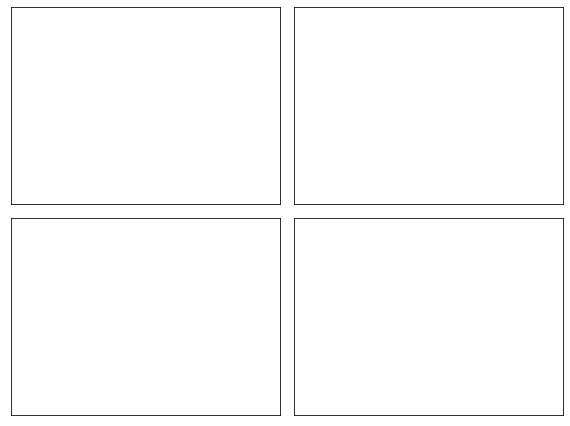

In [17]:
plotter.plot_weights('model/sentiment_regressor2/weights.txt')

# testing 

In [2]:
regressor = TextRegressor.load('model/sentiment_regressor2/best-model.pt')

2021-01-28 11:53:24,746 loading file model/sentiment_regressor2/best-model.pt
2021-01-28 11:53:27,145 Using REGRESSION - experimental


In [5]:
train_eval, train_loss = regressor.evaluate(corpus.train)

In [6]:
train_loss

tensor(0.0122, device='cuda:0')

In [10]:
test_eval, test_loss = regressor.evaluate(corpus.test)
test_loss

tensor(0.0252, device='cuda:0')

In [6]:
for i in range(20):
    print('*'*20)
    print(regressor.predict(corpus.train[i]))

********************
[Sentence: "a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films"   [− Tokens: 17  − Sentence-Labels: {'class': [4 (1.0)], 'regression': [[3.8751368522644043] (1.0)]}]]
********************
[Sentence: "apparently reassembled from the cutting-room floor of any given daytime soap ."   [− Tokens: 12  − Sentence-Labels: {'class': [1 (1.0)], 'regression': [[0.9098658561706543] (1.0)]}]]
********************
[Sentence: "they presume their audience wo n't sit still for a sociology lesson , however entertainingly presented , so they trot out the conventional science-fiction elements of bug-eyed monsters and futuristic women in skimpy clothes ."   [− Tokens: 35  − Sentence-Labels: {'class': [1 (1.0)], 'regression': [[1.2147924900054932] (1.0)]}]]
********************
[Sentence: "the entire movie is filled with deja vu moments ."   [− Tokens: 10  − Sentence-Labels: {'class': [2 (1.0)], 'regression': [[1.708392858505249] (1.0

In [7]:
regressor.predict(corpus.test[0:3])

[Sentence: "no movement , no yuks , not much of anything ."   [− Tokens: 11  − Sentence-Labels: {'class': [1 (1.0)], 'regression': [[0.8875808715820312] (1.0)]}],
 Sentence: "a gob of drivel so sickly sweet , even the eager consumers of moore 's pasteurized ditties will retch it up like rancid crÃ¨me brÃ»lÃ©e ."   [− Tokens: 26  − Sentence-Labels: {'class': [0 (1.0)], 'regression': [[-0.11567139625549316] (1.0)]}],
 Sentence: "` how many more voyages can this limping but dearly-loved franchise survive ? '"   [− Tokens: 14  − Sentence-Labels: {'class': [2 (1.0)], 'regression': [[1.2057865858078003] (1.0)]}]]

In [8]:
sentences = ["I like the food so much!",
             "That sounds great",
             "Can you do me a favor?",
             "Let's meet at 10am",
             "I have no idea about it",
             "I think it won't work"
            ]

In [9]:
for i in range(len(sentences)):
    sent = Sentence(sentences[i])
    print(regressor.predict(sent))

[Sentence: "I like the food so much !"   [− Tokens: 7  − Sentence-Labels: {'regression': [[2.3020195960998535] (1.0)]}]]
[Sentence: "That sounds great"   [− Tokens: 3  − Sentence-Labels: {'regression': [[2.4725964069366455] (1.0)]}]]
[Sentence: "Can you do me a favor ?"   [− Tokens: 7  − Sentence-Labels: {'regression': [[1.7931777238845825] (1.0)]}]]
[Sentence: "Let 's meet at 10am"   [− Tokens: 5  − Sentence-Labels: {'regression': [[1.845621943473816] (1.0)]}]]
[Sentence: "I have no idea about it"   [− Tokens: 6  − Sentence-Labels: {'regression': [[0.8423361778259277] (1.0)]}]]
[Sentence: "I think it wo n't work"   [− Tokens: 6  − Sentence-Labels: {'regression': [[1.2665587663650513] (1.0)]}]]
